# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set_context('notebook')

## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# 1) Data validation
Task: Describe validation and cleaning steps for every column in the data.


Data - 947 rows, 8 columns. 4 numerical columns, 2 character columns, 1 ID column.


- recipe: 947 unique IDs, no cleaning, dropped.
- calories: 895 non-null values. 52 missed entries replaced with the median grouped by category and servings.
- carbohydrate: 895 non-null values. 52 missed entries replaced with the median grouped by category and servings.
- sugar: 895 non-null values. 52 missed entries replaced with the median grouped by category and servings.
- protein: 895 non-null values. 52 missed entries replaced with the median grouped by category and servings.
- category: 11 unique values, no missing entries. Expected 10 values from the description. `Chicken Breast` is replaced with `Chicken` to bring the unique value to 10. 
- servings: 6 unique values, no missing entries. Converted from string to numeric integer type after removing `as a snack` postfix from several data points. 
- high_traffic: only 1 non-null value ("High"). Replaced null values with "Low". Later we will work with this as with a boolean type.


In [2]:
#read data and info
df = pd.read_csv('recipe_site_traffic_2212.csv')
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


None

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [3]:
#view a few rows
df.head(5)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [4]:
#count number of missing per column
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [5]:
#number of unique values
display(df.nunique())
display(df['category'].unique())
display(df['servings'].unique())


recipe          947
calories        891
carbohydrate    835
sugar           666
protein         772
category         11
servings          6
high_traffic      1
dtype: int64

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

## Replacing missing and incorrect categories

In [6]:
df.drop('recipe', axis = 1, inplace=True)
df['servings'] = df['servings'].replace({"4 as a snack": '4', "6 as a snack": '6'})
df['servings'] = df['servings'].astype(int)

df['category'] = df['category'].replace({"Chicken Breast": 'Chicken'})

df['high_traffic'] = df['high_traffic'].fillna("Low")



In [7]:
df_imputed = df.copy()

columns_to_impute = ['calories', 'carbohydrate', 'sugar', 'protein']
#replace with median
for col in columns_to_impute:
    df_imputed.fillna({col: df.groupby(by = ["category","servings"])[col].transform('median')}, inplace = True)  

In [8]:
df_imputed.isna().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [9]:
#wrap up validation and missing filling

df = df_imputed
del df_imputed

display(df.info())

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      947 non-null    float64
 1   carbohydrate  947 non-null    float64
 2   sugar         947 non-null    float64
 3   protein       947 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    int64  
 6   high_traffic  947 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 51.9+ KB


None

,calories,carbohydrate,sugar,protein,servings
count,947.000000,947.000000,947.000000,947.000000,947.000000
mean,432.100676,34.456932,8.907666,23.961061,3.477297
std,441.604401,42.898399,14.395536,35.491916,1.732741
min,0.140000,0.030000,0.010000,0.000000,1.000000
25%,113.905000,9.135000,1.795000,3.425000,2.000000
50%,299.320000,21.480000,4.460000,11.200000,4.000000
75%,576.635000,43.230000,9.565000,30.655000,4.000000
max,3633.160000,530.420000,148.750000,363.360000,6.000000


In [10]:
#note that there are some duplicated due to the imputation, I will keep it, although the model and final results do not depend on that decision.
df[df.duplicated( keep = False )].sort_values(by = 'calories').head(10)

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
405,107.710,12.750,4.50,5.600,Vegetable,4,High
538,107.710,12.750,4.50,5.600,Vegetable,4,High
427,107.710,12.750,4.50,5.600,Vegetable,4,High
209,239.900,31.550,23.19,3.380,Dessert,2,High
121,239.900,31.550,23.19,3.380,Dessert,2,High
149,267.605,32.045,2.52,5.145,Potato,2,High
943,267.605,32.045,2.52,5.145,Potato,2,High
212,290.220,63.755,20.93,4.340,Dessert,4,High
749,290.220,63.755,20.93,4.340,Dessert,4,High
711,301.490,27.540,2.97,17.790,Lunch/Snacks,4,High


# 2) Data visualisation
Tasks: 
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features  
  - Describe your findings 


I visualize the impact of category and number of servings on the target variable (`high_traffic`) using **bar charts**. From the former it immediately follows that **some categories of data are more prone to attract attention of customers** (e.g. `Pork`, `Vegetable`, `Potato`), others don't (in fact, **opposite trend is observed**). From the latter plot one can think that the number of servings may not be the key factor for driving the decision.

From my bar chart is it also visible that the chicken is the most popular category in data, and the number of servings equal to 4 is most presented in the data. 

Additional insights comes from the **histogram** which shows that the calories has quite broad and skewed distribution, with the majority of recipes having less than 1000 calories (per serving).

Boxplots show the similar results for other variables: they are skewed towards low values and have no to little outliers. 

The numerical data (excluding `category`) show some **correlation** among features (e.g. `protein` and `calories`), but not a strong one. Pair plot also shows the similar point (including dividing data accordingly to the target varaible). 
Pairplot also gives a feeling towards the **distribution of numerical** features for different values of target variable. All features form well-bahaved one-peaked distributions with **no obvious outliers**.

One would expect that the `category` **would be the defining feature** for a machine learning model to grab.

<AxesSubplot: xlabel='servings', ylabel='count'>

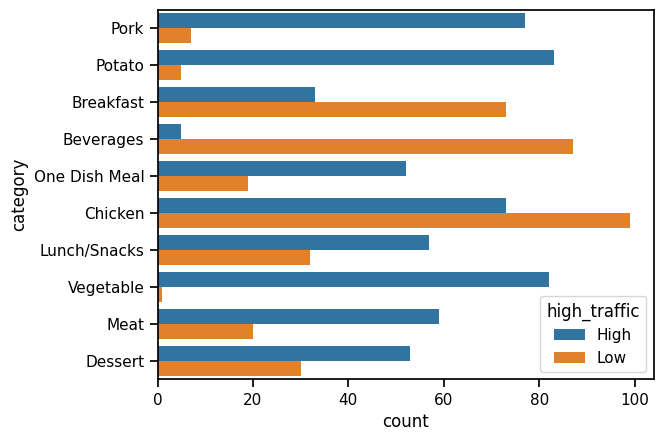

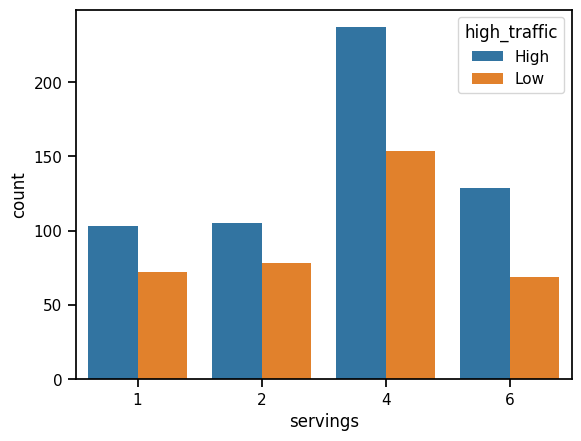

In [11]:
sns.countplot(df, y="category", hue="high_traffic")
plt.figure()
sns.countplot(df, x="servings", hue="high_traffic")

<AxesSubplot: xlabel='calories per serving'>

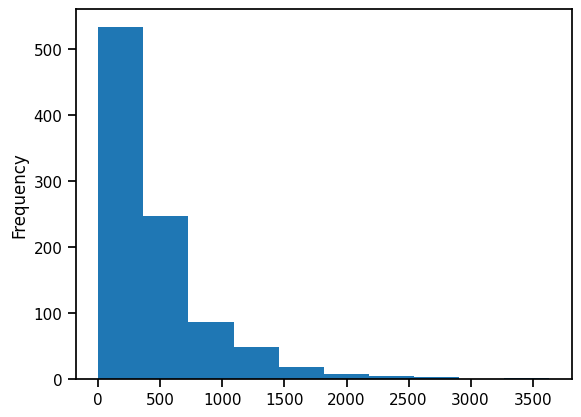

<Figure size 640x480 with 0 Axes>

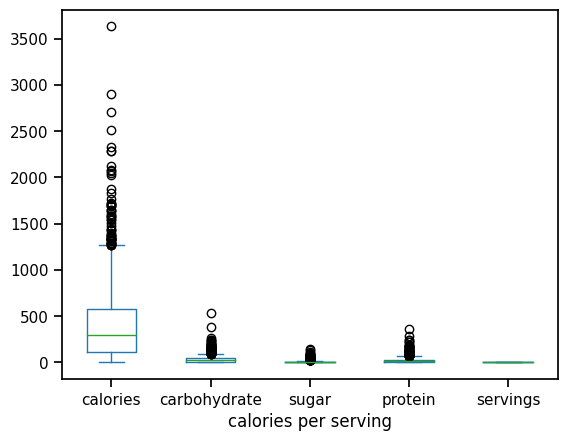

In [25]:
df['calories'].plot(kind = 'hist', xlabel = 'calories per serving')
plt.figure()
df.plot(kind = 'box', xlabel = 'calories per serving')

<AxesSubplot: >

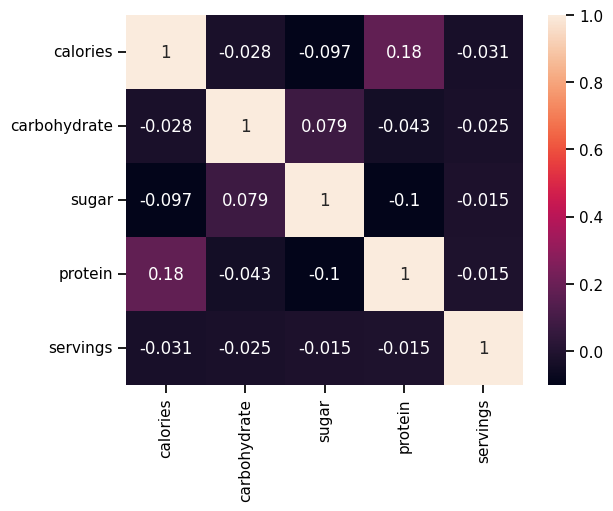

In [12]:
sns.heatmap(df.corr(), annot=True)

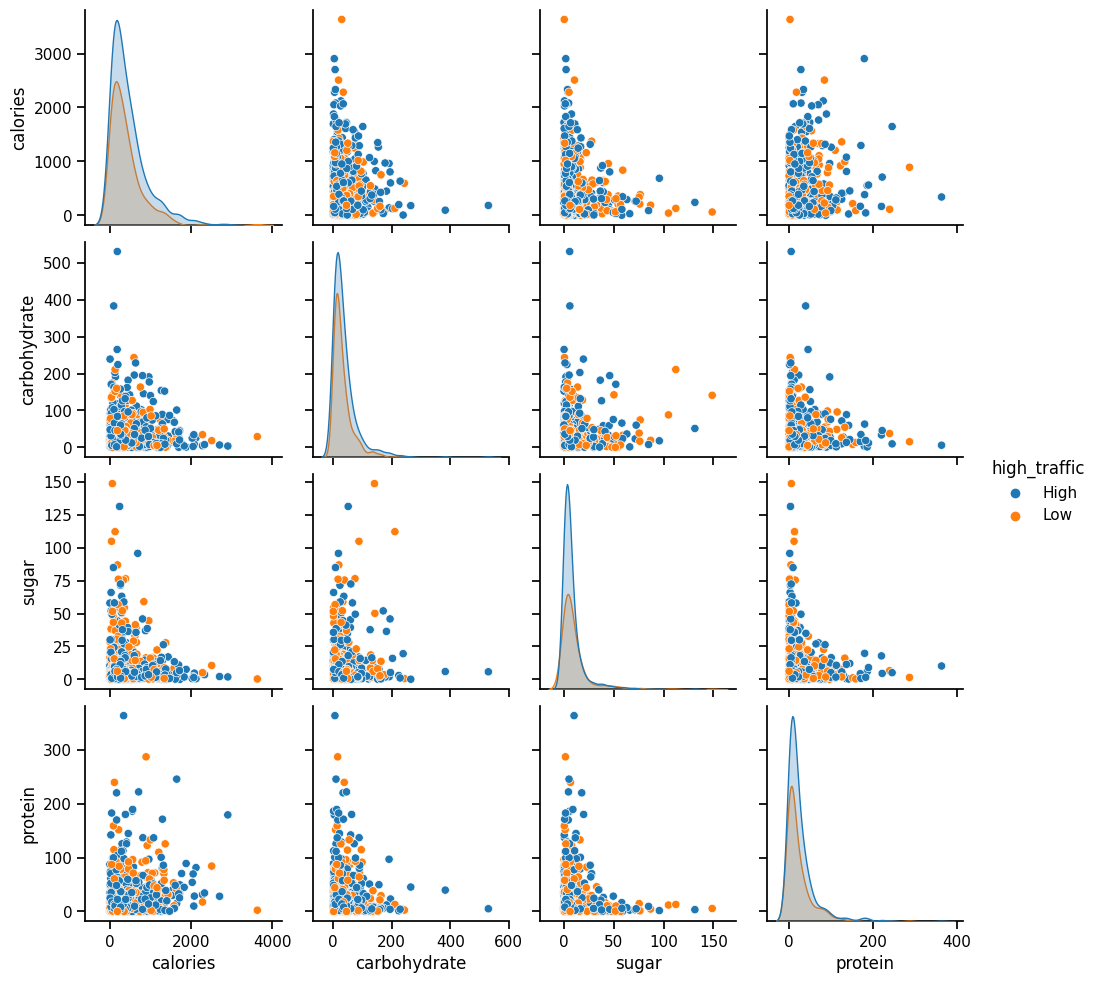

In [13]:
sns.pairplot(df, vars = ['calories', 'carbohydrate', 'sugar', 'protein'], hue = 'high_traffic')

# 3) Model Development &  4) Model evaluation
Tasks:
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
  - Describe the performance of the two models based on an appropriate metric

This problem is of a **binary classification** type. I will try solving the problem with a Random forest classifier and a Logistic regression models.

As from the preprocessing step, I translate category into Label **encodings** (strings are replaced by an integer). One-hot encoding would be a possibility to try to improve the model. 
I also scale the data to bring the magnitude of features closer to 1. 
The data is split into training and testing

**Note**: I use scaler on the whole dataset (not only on train). This creates a small data leakage, but for the purpose of demonstation it is not crucial. The dataset it large and normally-behaved enough and any train/test split would produce representative subsample for us to train scalers. In the end of the day we can simply divide numerical columns by their expected magnitudes (e.g. mean) to scale the features.



As for model training, I do a **hyperparameter search** to find optimal settings for model's a-priori parameters. For logreg I vary the regularisation strength as well as regularization technique. For the random fores I vary the number of trees, their max depth and the balance of classes strategy.


After choosing best hyperparameters and fitting again (`refit=True` for CV object) I calculate the **precision**, **recall** and **f1 score** for the positive class (high traffic recipies). 

For the **logistic regression** the precision, recall and f1 scores are all `0.8`. For **random forest** the figures are `0.81`, `0.77`,`0.79`. f1 score tries to balance the effects of precision and recall, rendering the **logistic regression slightly better than the random forest**.  **Accuracies** are, respectively, `0.77` and `0.76`.

I also show that **feature importances** for both models signal  `category` feature as the most decisive factor for the output variable.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

df_ml = df.copy()

onehot = OneHotEncoder()
scaler = StandardScaler()
label = LabelEncoder()

df_ml['high_traffic'] = df_ml['high_traffic'].replace({"High": 1, "Low": 0})
df_ml['category'] = label.fit_transform(df_ml['category'])

df_ml[['calories', 'carbohydrate', 'sugar', 'protein']]= scaler.fit_transform(df_ml[['calories', 'carbohydrate', 'sugar', 'protein']])


X = df_ml.drop('high_traffic', axis = 1)
y = df_ml['high_traffic']
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)



## Logistic regression model

In [15]:
grid = {
    "C": np.logspace(-3, 3, 10),
    "penalty": ["l1", "l2", "elasticnet", None],
}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5)
logreg_cv.fit(X_train, y_train)

print("Tuned hyperparameters:", logreg_cv.best_params_)

Tuned hyperparameters: {'C': 0.004641588833612777, 'penalty': 'l2'}


## Random forest classifier

In [16]:
grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 3, 5, 10],
    "class_weight": ["balanced"]
}
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, grid, cv=5)
rf_cv.fit(X_train, y_train)

print("Tuned hyperparameters:", rf_cv.best_params_)

Tuned hyperparameters: {'class_weight': 'balanced', 'max_depth': 3, 'n_estimators': 100}


## Compare matrics for both

In [17]:
y_pred_logreg = logreg_cv.predict(X_test)
y_pred_rf = rf_cv.predict(X_test)


print("Confusion matrix (logreg):\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification report (logreg):\n", classification_report(y_test, y_pred_logreg))
print("Accuracy (logreg)", accuracy_score(y_test, y_pred_logreg))

print("Confusion matrix (rf):\n", confusion_matrix(y_test, y_pred_rf))
print("Classification report (rf):\n", classification_report(y_test, y_pred_rf))
print("Accuracy (rf)", accuracy_score(y_test, y_pred_rf))


Confusion matrix (logreg):
 [[ 85  34]
 [ 33 133]]
Classification report (logreg):
               precision    recall  f1-score   support

           0       0.72      0.71      0.72       119
           1       0.80      0.80      0.80       166

    accuracy                           0.76       285
   macro avg       0.76      0.76      0.76       285
weighted avg       0.76      0.76      0.76       285

Accuracy (logreg) 0.7649122807017544
Confusion matrix (rf):
 [[ 88  31]
 [ 37 129]]
Classification report (rf):
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       119
           1       0.81      0.78      0.79       166

    accuracy                           0.76       285
   macro avg       0.76      0.76      0.76       285
weighted avg       0.76      0.76      0.76       285

Accuracy (rf) 0.7614035087719299


## Feature importance for interpretation 

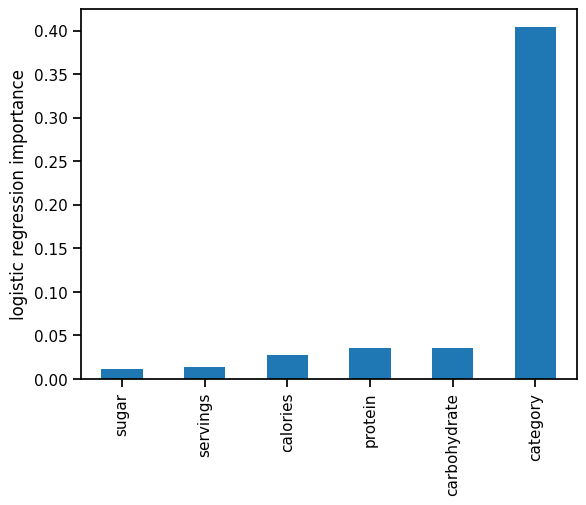

<AxesSubplot: ylabel='random forest importance'>

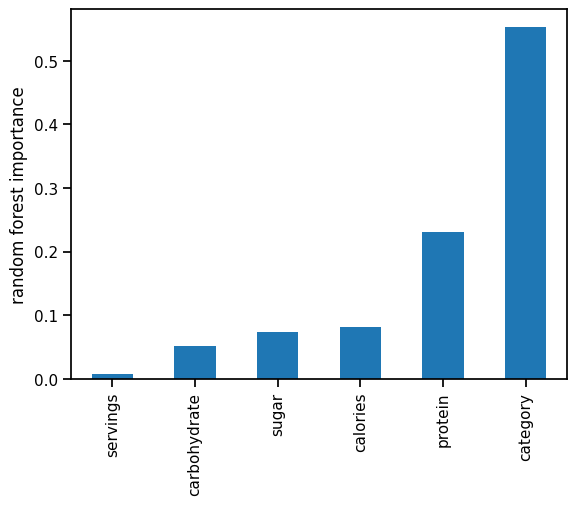

In [18]:
pd.Series(logreg_cv.best_estimator_.coef_[0], index = feature_names).abs().sort_values().plot(kind = 'bar', ylabel = 'logistic regression importance')
plt.show() 
pd.Series(rf_cv.best_estimator_.feature_importances_,  index = feature_names).sort_values().plot(kind = 'bar', ylabel = 'random forest importance')

# 4) Business Metrics & 5) Recommendations
- Define a way to compare your model performance to the business
- Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake


 Two main business aims:

1. **predict which recipes will be with high traffic**;

2. **predict the high value of traffic with 80% probability**. 

-The Logistic Regression model has achieved those goals, because of the high rates of precision, recall and f1 score (all around or better than `0.8`). 


- To help the company predict the high traffic of the recipes, we can use the  **Logistic Regression Model** in production. We will be classifying (predicting) correctly about 80% of the high-traffic recipies. It will **generate more trafic to the website and potentiaaly increased revenue flow**. 

- Note that with the exporatory analysis of data, as well as machine learning models we find that some products are more popular (in terms of traffic) than the others, for example **`Pork`, `Vegetable`, `Potato` are culprits for high traffic**. Increasing the fraction of recipies shows from those categories will **lead to the increase in traffic overall**.

- For constantly improving the deployed model we may use **online learning approach** (when we constantly enhancing the model as new data arrives in almost real time). The business will also monitor the model constantly in this scenario as the new data arrives. 

- Also to increase the model performance we may add relevant features such as **cost of the recepie**, **time to prepare and cook the meal**, **history of user's visited recepie**. Filling the missing data is also recommended. 
